A More Realistic World:

In our situation, Peter was able to move around almost without getting tired or hungry. In a more realistic world, we has to sit down and rest from time to time, and also to feed himself. Let's make our world more realistic.

The question says we may wish to represent the state of peter (Board, fatigue, energy) as a tuple, class or modify Board class in the rlboard.py

So i choose to create new separate class to represent the state of peter.

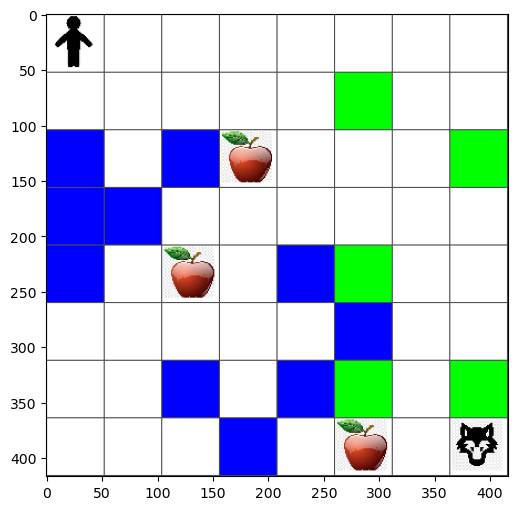

In [1]:
from rlboard import *

width, height = 8, 8
m = Board(width, height)
m.randomize(seed=13)
m.plot()

In [2]:
actions = {'U':(0,-1), 'D':(0,1), 'L':(-1,0), 'R':(1,0)}
action_indx = {a : i for i,a in enumerate(actions.keys())}

In [3]:
# Class that will represent the state of peter
class state:
    def __init__(self,board,energy=10,fatigue=0,init=True):
        self.board = board
        self.energy = energy
        self.fatigue = fatigue
        self.dead = False
        if init:
            self.board.random_start()
        self.update()

    def at(self):
        return self.board.at()

    def update(self):
        if self.at() == Board.Cell.water:
            self.dead = True
            return
        if self.at() == Board.Cell.tree:
            self.fatigue = 0
        if self.at() == Board.Cell.apple:
            self.energy = 10

    def move(self,a):
        self.board.move(a)
        self.energy -= 1
        self.fatigue += 1
        self.update()

    def is_winning(self):
        return self.energy > self.fatigue

In [4]:
def random_policy(m):
    return random.choice(list(actions))

def walk(m, policy, start_position=None):
    n = 0
    if start_position:
        m.human = start_position
    else:
        m.random_start()
    while True:
        if m.at() == Board.Cell.apple:
            return n 
        if m.at() in [Board.Cell.wolf, Board.Cell.water]:
            return -1
        while True:
            a = actions[policy(m)]
            new_pos = m.move_pos(m.human, a)
            if m.is_valid(new_pos) and m.at(new_pos) != Board.Cell.water:
                m.move(a)
                break
        n += 1

walk(m, random_policy)

18

In [5]:
def print_statistics(policy):
    s,w,n = 0,0,0
    for _ in range(100):
        z = walk(m, policy)
        if z <= 0:
            w += 1
        else:
            s += z 
            n += 1
    print(f"Average path length = {s/n}, eaten by wolf is: {w} times")

print_statistics(random_policy)

Average path length = 32.87096774193548, eaten by wolf is: 7 times


In [6]:
move_reward = -0.1
goal_reward = 10
end_reward = -10

def reward(m, pos=None):
    pos = pos or m.human
    if not m.is_valid(pos):
        return end_reward
    x = m.at(pos)
    if x == Board.Cell.water or x == Board.Cell.wolf:
        return end_reward
    if x == Board.Cell.apple:
        return goal_reward
    return move_reward

C:\Users\PC\AppData\Local\Temp\ipykernel_5528\2631692713.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Q = np.ones((width, height, len(actions)), dtype=np.float) * 0.1/len(actions)


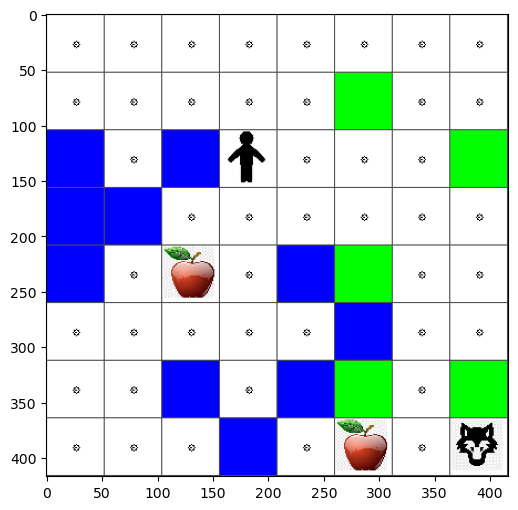

In [7]:
Q = np.ones((width, height, len(actions)), dtype=np.float) * 0.1/len(actions)
m.plot(Q)

In [8]:
def probs(v, eps=1e-4):
    v = v-v.min()+eps
    v = v/v.sum()
    return v 

[]

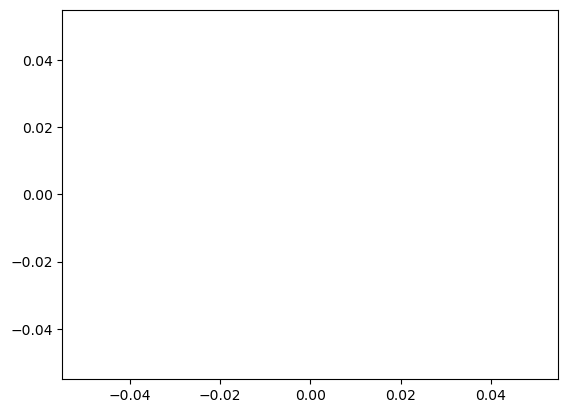

In [9]:
from IPython.display import clear_output

lpath = []
for epoch in range(5000):

    m.random_start()
    n = 0
    cum_reward = 0
    while True:
        x, y = m.human
        v = probs(Q[x,y])
        a = random.choices(list(actions), weights=v)[0]
        dpos = actions[a]
        m.move(dpos, check_correctness=False)
        r = reward(m)
        cum_reward += r
        if r == end_reward or cum_reward < -1000:
            lpath.append(n)
            break
        alpha = np.exp(-n / 10e5)
        gamma = 0.5
        ai = action_indx[a]
        Q[x,y,ai] = (1 - alpha) * Q[x,y,ai] + alpha * (r + gamma * Q[x+dpos[0], y+dpos[1]].max())
        n += 1 

plt.plot()

In [ ]:
def qpolicy_strict(m):
    x,y = m.human
    v = probs(Q[x, y])
    a = list(actions)[np.argmax(v)]
    return a

walk(m,qpolicy_strict)

In [ ]:
def qpolicy(m):
    x,y = m.human
    v = probs(Q[x,y])
    a = random.choices(list(actions), weights=v)[0]
    return a 

print_statistics(qpolicy)

In [ ]:
plt.plot(lpath)